In [1]:
import numpy as np
import sklearn.decomposition
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
import json
dat = json.load(open('jsons/kirakira/JPN/kirakira_JPN_adachi-e.json'))
points = np.array(dat['vertex'])

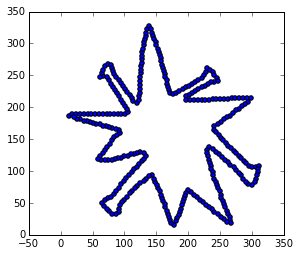

In [49]:
plt.subplot().set_aspect(1)
plt.scatter(*points.T)

In [17]:
pca = sklearn.decomposition.PCA()
pca.fit(points)

PCA(copy=True, n_components=None, whiten=False)

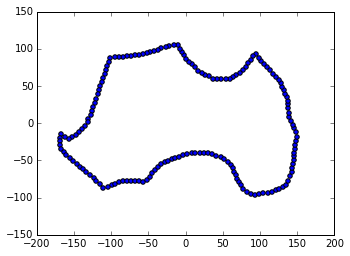

In [25]:
plt.subplot().set_aspect(1)
transformed = pca.transform(points)
plt.scatter(*transformed.T)

In [44]:
std = transformed.std(axis=0)
aspect = std[0] / std[1]
direction = pca.components_[0]
aspect, direction

(1.5500989447916576, array([ 0.21054867,  0.97758338]))

In [3]:
def analyse(points):
    pca = sklearn.decomposition.PCA()
    pca.fit(points)
    transformed = pca.transform(points)
    std = transformed.std(axis=0)
    aspect = std[0] / std[1]
    direction = pca.components_[0]
    return aspect, direction

In [4]:
analyse(points)

(1.5500989447916576, array([ 0.21054867,  0.97758338]))

In [74]:
import glob

onomatopeia_list = [
    'clutter', 'gochagocha',
    'murmur', 'sarasara',
    'twinkle', 'kirakira',
]

dat = []
for onomatopeia in onomatopeia_list:
    filename_pattern = 'jsons/%s/*/*' % onomatopeia
    print filename_pattern
    onomatpeia_dat = []
    for filename in sorted(glob.glob(filename_pattern)):
        dic = json.load(open(filename))
        onomatpeia_dat.append(dic['vertex'])
    print len(onomatpeia_dat)
    dat.append(onomatpeia_dat)

dat = [dat[i] + dat[i+1] for i in range(0, len(dat), 2)]
genshou_name = [onomatpeia_list[i] + '-' + onomatopeia_list[i+1] for i in range(0, len(onomatopeia_list), 2)]

jsons/clutter/*/*
103
jsons/gochagocha/*/*
103
jsons/murmur/*/*
103
jsons/sarasara/*/*
103
jsons/twinkle/*/*
103
jsons/kirakira/*/*
103


In [83]:
for genshou_dat, genshou in zip(dat, genshou_name):
    aspect = []
    direction = []
    for shape in genshou_dat:
        a, d = analyse(np.array(shape))
        if d[0] < 0:
            d *= -1
        d = np.arctan2(d[1], d[0])
        aspect.append(a)
        direction.append(d)
    print genshou, np.mean(aspect),  np.mean(direction) # * 180 / np.pi

clutter-gochagocha 1.62229029295 0.0228861394664
murmur-sarasara 2.04775438778 -0.155873470571
twinkle-kirakira 1.50665599111 -0.189936642615
